# Introduction and motivating examples

This analytical report proposes a way to properly evaluate the play of linemen in football through multiple Bayesian models. As motivating examples for work, see these plays.

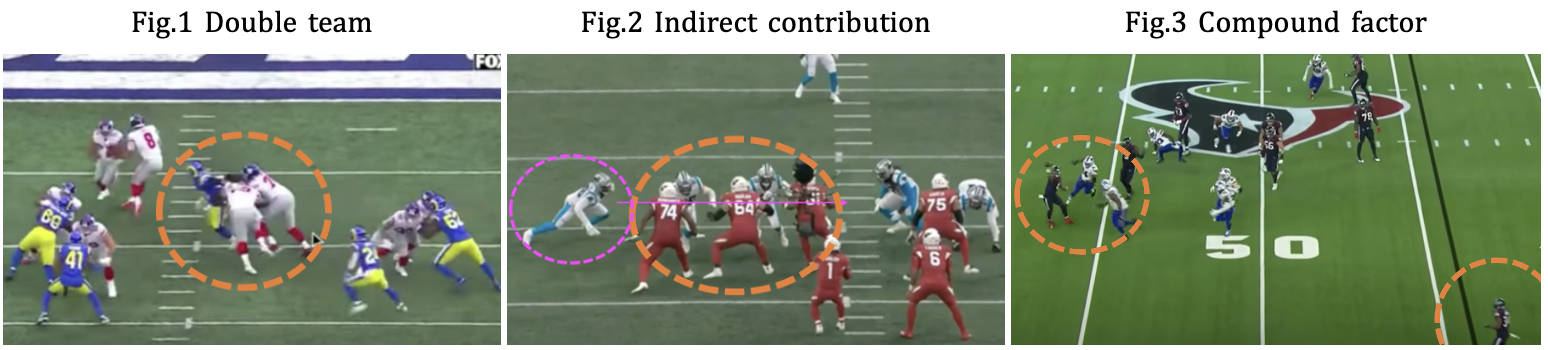

In the play shown in Figure 1, the Rusher was double-teamed from the beginning of the play, but he overwhelmed 2 Blockers and got a sack. Traditional statistics recorded the sack, but did **NOT** record that he had broken through the very tough situations.

In the play shown in Figure 2, the 2 rushers attracted 3 blockers. This created a gap so that the Rusher on the left was able to run inside and put pressure on the passer. 
This indirect contribution of the 2 rushers was **NOT** evaluated in traditional metric.

In the play shown in Figure 3, 2 rushers scored hurry, but the the pass was successful because the receiver was wide open. **Since all players, not just the linemen, play hard to impact the outcome so focusing only on linemen does not allow us to explain the results nor evaluate their share of contribution**. Traditional evaluation methods focus only on the linemen, and it is unclear how their play affected the outcome. So even if they got a "sack" or a "hurry", we don't know how valuable it was to the team's victory.

# Basic idea and overview

With these issues in our mind, we wanted to devise a new framework. And there were two basic ideas.
1. **Attracting additional blocking help should be evaluated. Because it will lead indirect contribution to other Rushers.**
2. **We want to identify linemen’s share of contribution to the pass outcome. Because that is the only way to evaluate play based on results.**

In our analysis, we devised a **Player Impact Distribution**, which we used to develop a framework for quantitatively analyzing mutual influence.   
Utilizing this framework, we first identified the **Blocker assignment shift** and visualized the impact transition of the Blocker on the Rusher.  

Second, we focused on the impact of Rusher, Blocker, and Coverage on the Passer/Receiver and created **pass failure probability explain models** to quantitatively assess how each player's performance/openness led to the pass results.  

Third, we identified the **dangerous Rushers that attract additional blocking help** by merging the previous two ideas.  

Fourth, we defined the Blocker ability metric based on the degree of impact the assigned Rusher had on the Passer. This metric identifies the **Blocker ability to hold a Rusher in place without moving towards QB**.    

Finally, we give a conclusion and summarize metrics. Again, we explain how our proposed metric **leads to pass results** in this chapter.

Because of the time constraints of this project, we just focused on four potential topics, but we believe there are infinite topics for analysis using this framework. In the Future direction chapter, we added a few possible analysis ideas for NFL strategy building.

<img src="https://drive.google.com/uc?id=1bbSUIEKffrp5c8NZC2MIHPW-FB4FRUT5" width=1000>

# Player Impact Distribution

The players' impact on each other is greater in the direction they are moving or facing, and **NOT** on their backs or in the direction they cannot see. There are also physical constraints on the distance (within reach) that can be impacted. So when expressing the impact of a player in terms of distribution, it is essential that it be **1-way directional** and have characteristics that **attenuate the degree of impact with distance**.  
The **Gaussian-Gamma mixture distribution** is a mixture of Gaussian distribution and Gamma distribution. It combines the **1-way directionality** provided by the Gamma distribution with the **spherically decaying** characteristics provided by the Gaussian distribution.

In this section, we describe how the Gaussian-Gamma mixture distribution describes "player impact distribution" and used for each player role.

<img src="https://drive.google.com/uc?id=1fhniKmI_MfBVgGDL0UgdBHWIrTwICQCz" width=1000>

# Blocking assignments shift and Impact transition on Rusher

First, we focused on changes in the impact of Blockers on Rushers and identified how **blocking assignments** shifted.

The following animation visualizes the impact using the **Blocker to Rusher Impact Distribution**. By comparing the magnitude of this influence, we identified which Blockers have the most influence on which Rushers.

<img src="https://drive.google.com/uc?id=1r-eLe36vBzine_q8g8xsmk8ysNV3i3kP">

The green heatmap shows the **Blocker to Rusher Impact Distribution** and the node-to-node relationship diagram shows which Blockers strongly impact which Rushers. The time-series graphs show the transition of the impact that the Rusher received from the Blockers. Rushers with high values are marked by multiple Blockers, meaning they are in a difficult situation.

# Pass failure probability model

Next, we focused on the impact of Rusher, Blocker, and Coverage on the Passer/Receiver. 
The **Rusher to Passer Impact Distribution** describes the pressure that Rushers exert on Passers, the **Blocker to Passer Impact Distribution** describes the security that Blockers give to the Passer, and the **Coverage to Receiver Impact Distribution** describes the pressure that Coverages exert on Receiver.

The following animation visualizes the **threats to the Passer** (orange heatmap) and the **threats to the Receiver** (blue heatmap).

The threat to the Passer is defined as the **difference** between the Rusher's impact  minus the Blocker's impact on the passer and the threat to the Receiver is defined by the product of the value of the Coverage's impact and the distance from the Passer. (See the 'Math' chapter for details) 


<img src="https://drive.google.com/uc?id=1PfM84jnh3O7KJf0sN0Rs9dKfeF6DEa-r">

Based on these impacts, we can build a model to explain the **probability of pass failure** and describe how each player's performance/openness led to the pass results.


## Math

The path failure probability is defined as follows.

$
P(pass\_failure) = sigmoid(c_0 Rusher\_total\_impact - c_1 Blocker\_total\_impact + c_2 Receiver\_risk + Passer\_skill)
$

While,

$c_l = $ coefficients.

$
Rusher\_total\_impact = \frac{1}{T} \sum_{rusher_i} \sum_{t} Rusher\_impact(t, rusher_i) \\
Rusher\_impact(t, rusher_i) = PID_{rshr2pssr}(x_{rusher_i}(t), y_{rusher_i}(t), dir_{rusher_i}(t), x_{passer}(t), y_{passer}(t)) \\
rusher_i = 1, 2, ... num\_of\_rushers \\
$
$t$ = 1, 2, 3 ... end of frameId - 6 (= pass throwing time)  
$T$ = Maximum value - 6 of frameId for a play  
$PID_{rshr2pssr}$ = Rusher to Passer Player Impact Distribution pdf  


$x_{passer}(t), y_{passer}(t)$: Position coordinates $(x, y)$ of the passer at time t  
$x_{rusher_i}(t), y_{rusher_i}(t)$: Position coordinates $(x, y)$ of $rusher_i$ at time t    
$dir_{rusher_i}(t)$: Direction $rusher_i$ is moving at time t  

Similarly to the above, $Blocker\_total\_impact$ is defined as follows

$
Blocker\_total\_impact = \frac{1}{T} \sum_{blckr_j} \sum_{t} Blocker\_impact(t, blckr_j)　\\
Blocker\_impact(t, blckr_j) = PID_{blckr2pssr}(x_{blckr_j}(t), y_{blckr_j}(t), o_{blckr_j}(t), x_{passer}(t), y_{passer}(t))　\\
blckr_j = 1, 2, ... num\_of\_blockers\\
$

$PID_{blckr2pssr}$ = Blocker to Passer Player Impact Distribution pdf  
$o_{blckr_j}(t)$: Orientation $blckr_j$ is facing at time t  



$Receiver\_risk$ is represented by the product of the distance from the Passer to Receiver and the impact of the Coverage on the Receiver at the moment the Passer throws the pass. Receiver is identified from the "playDescription" column of the "play.csv" data.

$
Receiver\_risk = \sum_{coverage_k} Coverage\_impact(coverage_k) * dist(passer, reciever)
$

While, 

$
Coverage\_impact(coverage_k) = PID_{cvrg2rcvr}(x_{coverage_k}(t_{passtime}), y_{coverage_k}(t_{passtime}), dir_{passer\_to\_receiver}(t_{passtime}), x_{pass\_receiver}(t_{passtime}), y_{pass\_receiver}(t_{passtime}))
$

$PID_{blckr2pssr}$ = Coverage to Reciever Player Impact Distribution pdf.  
$t_{passtime}$ = end of frameId - 6 (frameId at the moment the passer throws).    
$dir_{passer\_to\_receiver}(t)$ indicates the direction from the Passer to the Receiver at time t.

$Passer\_skill$ shows that the probability of pass failure differs depending on the Passer's ability in similar situations, and the skill estimate is calculated by Bayes' theorem under the following prior distribution assumptions (Please see [Item response theory](https://docs.pymc.io/en/v3/pymc-examples/examples/case_studies/item_response_nba.html) for detail).

$
Passer\_skill_l = \mu_{\rho} + \sigma_{\rho} \delta_{\rho, l} \sim Normal(\mu_{\rho}, \sigma_{\rho}^2)
$

$l = 1, 2, ... num\_of\_passers$ 


with prior distributions

$
\mu_{\rho} \sim Normal(0, 1), \\
\sigma_{\rho} \sim HalfCauchy(0, 0.5), \\
\sigma_{\rho} \sim HalfCauchy(0, 0.5), \\
\delta_{\rho, l} \sim Normal(0, 1).
$



## Model overview and validation performance

The overview, estimated coefs of variables, and its validation performance is shown below.
7267 plays in total, excluding foul plays and plays where the Passer and Receiver were free (but the pass was missed). 1454 plays (20%), were randomly held out for validation.

<center>
<img src="https://drive.google.com/uc?id=1vk2UR3HPRnG_Tba_9d9hHj0_8dRctazN" width="850">
</center>

<center>
<img src="https://drive.google.com/uc?id=1vQZHrmV3ys14uPmDbXYtLGelKSRdHTq8" width="850">
</center>



## Animation with estimated pass failure probability  

Based on the pass failure model, following 4 performance indicators were calculated and now we can observe how each player's movement affected the pass failure probability.
1. Rusher's impact to Passer 
2. Total threats to Passer
3. Total threats to Receiver
4. Estimated pass failure probability



<img src="https://drive.google.com/uc?id=1JLoygVT6idOeo5i141LkXLj5qDT832ud">


# Rusher ability estimation

The "Blocking assignments shift" section quantifies the degree of impact the Blocker had on the Rusher. This value indicates the difficulty (marked by mutiple Blockers) of the Rusher's situation.  
And the "Pass failure probability model" section, pass failure was explained by the Rusher's impact so that the Rusher impact value can be iterpreted as the Rusher's **contribution** to the pass failure.

**Combining these results** allows us to identify Rushers who can contribute significantly to pass failures, even when placed in difficult situations. This section generates another Bayesian model that evaluates and ranks Rusher ability that would attract additional blocking help.

## Math

We define Rusher ability as follows.

$
Rusher\_impact(rusher_i) = Rusher\_ability_i - \alpha_0 Blocker\_ttl\_impact_i
$

for $i = 1, 2, ... , Num\_of\_rushers$

The above definition indicates that a more competent Rusher can contribute more significantly to pass failure.

$Blocker\_ttl\_impact_i$ is the sum of the impact of all blockers on $rusher_i$. A rusher with a large value indicates that a Rusher is in more difficult situation, such as being marked by multiple blockers.

$
Blocker\_ttl\_impact_i = \sum_{blocker_j} Blocker\_to\_Rusher\_impact(blocker_j, rusher_i) \\
Blocker\_to\_Rusher\_impact(blocker_j, rusher_i) = PID(x_{blocker_j}(t), y_{blocker_j}(t), dir_{blocker_j}(t), x_{rusher_i}(t), y_{rusher_i}(t))
$

$Rusher\_ability_i$ is defined by following prior distributions. (Again please see [Item response theory](https://docs.pymc.io/en/v3/pymc-examples/examples/case_studies/item_response_nba.html) for detail)

$
Rusher\_ability_i = \mu_{\theta} + \sigma_{\theta} \delta_{\theta, i} \sim Normal(\mu_{\theta}, \sigma_{\theta}^2)
$

$
\mu_{\theta} \sim Normal(0, 1), \\
\sigma_{\theta} \sim HalfCauchy(0, 0.5), \\
\sigma_{\theta} \sim HalfCauchy(0, 0.5), \\
\delta_{\theta, i} \sim Normal(0, 1).
$



## Correlation between estimated ability and achievements

The scatterplot below takes the Rusher ability estimates of our model on the x-axis and **ratio_achivements** on the y-axis.

"ratio_achivements" of a Rusher is defined as below.

$
ratio\_achivements = \cfrac{(num\_of\_pff\_hit + num\_of\_pff\_hurry + num\_of\_pff\_sack)}{num\_of\_play}
$

The two variables have strong correlation (~0.7) each other, indicating that "rusher_ability" is explaining their achievements.

The Top 3 rankings of Rushers based on their estimated abilities are shown by DT and DE roles. **Only Rushers who have played 180 plays or more are plotted**, and the ranking is based on rusher ability.


<center><img src="https://drive.google.com/uc?id=1XyKUuH-Ii4Qanb6IQUOFPGdDDSO-95_6" width="1000"></center>


# Blocker ability metrics

Since the Blocker's role is to neutralize the threat that the Rusher poses to the Passer, the smaller the impact of the Rusher in charge, the greater the Blocker's contribution. Conversely, if the Rusher had a large impact on the Passer, the Blocker who was in charge of the Rusher was knocked out by the Rusher.

Thus, the Blocker ability can be defined as follows.

$
Blocker\_ability_j = \cfrac{1}{1 + \sum_{assigned\_rusher_i}  Rusher\_impact_i * Assigned\_Weight(blckr_j, rshr_i)}
$

While,

$assigned\_rusher_i$: Rusher assigned by the Blocker in a play.  
$Assigned\_Weight(blckr_j, rshr_i)$: Ratio of impact of $blckr_j$ on $rusher_i$ during a play

The top 3 Blockers by position are shown below. **Only Blockers who have played 200 plays or more are displayed**

<img src="https://drive.google.com/uc?id=1i6PTprvlAWy8dM8ov7hBrjeNgnsWMl6o">


# Conclusion - Metric
 
#### 1. Rusher impact on Passer
The pass failure model shows a **0.1 increase in Rusher total impact leads to an ~14% increase in pass failure probability**. Therefore, Rusher impact value can be used as a Rusher's performance on a pass play.

#### 2. Rusher ability
Since a competent Rusher is likely to be marked by multiple Blockers, it is not fair to evaluate a Rusher's ability based solely on the result of the impact on the Passer. We should take into account how much attention had been attracted. We additionally created a Bayesian model to estimate Rusher ability based on the degree of impact given to Rusher by the Blockers. We also proved that **our estimates correlated with Rusher's actual achievements** so that it is indicating this is valid as a metric for evaluating Rusher ability.

#### 3. Blocker ability
0.1 decrease in Rusher total impact leads to an ~14% decrease in pass failure probability. Thus, Blocker's contribution is to suppress Rusher's impact. When our proposed metric produces a high value, it is indicating the Blocker holds the Rusher and does not allow it to get close to the QB.


# Future direction

#### 1. Elaboration 
Right now, we are evaluating the lineman's ability on pass play only. Thus, the rankings would look different if we includes run play and others.
And our current pass failure model is intentionally simple for interpretability. But in reality, it is more complex and there are many other factors involved in path failure (i.e. Receiver skill, fatigue level, weather, player's condition, etc). So it is possible to improve prediction performance by machine learning using many variables.

#### 2. Multi-Agent optimization
The pass failure model connected how pass failure probability is affected by the actions of Blockers, Rushers, Passers, and Receivers. Rewards can be determined for each player's moving. Thus, the prerequisites for solving the multi-agent optimization problem appear to be in place. It will an interesting topic and will bring innovation to strategy building.

#### 3. Play adjust recommendation
The metric estimated the lineman's ability, but this estimate is an **overall evaluation** that is estimated based on the results of more than 200 plays. But the lineman's performance can be evaluated on a play-by-play basis. Therefore, by comparing the evaluation value of the most recent play with the overall evaluation, the lineman's current condition can also be estimated. Real-time analysis during play can identify **"linemen who are not in good shape today"** (the weak point of the opponent line) so that strategies can be adjusted to the current situation.

Thanks to the organizers for giving us the opportunity and thanks to all the analysts involved in the past NFL Big Data Bowl. We have learned a lot from them.

## Links

[Code](https://github.com/LichtLab/nfl_big_data_bowl_2023)

Collaborators - Contact us via LinkedIn
- [@lichtlab](https://www.linkedin.com/in/sho-sekine-831339a3/)
- [@ribocchi](https://www.linkedin.com/in/nao-sekine-864663191/)
